In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
web.__version__

'0.10.0'

In [3]:
df=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607437
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747405
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880667
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860234
2012-01-10,15.214286,15.053571,15.211071,15.115714,258196400.0,12.906277
2012-01-11,15.101786,14.975357,15.095714,15.091071,215084800.0,12.885242
2012-01-12,15.103571,14.955357,15.081429,15.049643,212587200.0,12.849864
2012-01-13,15.016071,14.952143,14.989286,14.993214,226021600.0,12.801682


In [2]:
!pip install pandas==0.23.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 24.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.1.74 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
xarray 0.20.2 requires pandas>=1.1, but you have pandas 0.23.4 which is incompatible.
pymc 4.1.4 requires pandas>=0.24.0, but you have pandas 0.23.4 which is incompatible.
prophet 1.1 requires pandas>=1.0.4, but you have pandas 0.23.4 which is incompatible.
plotnine 0.8.0 requires pandas>=1.1.0, but you have pandas 0.23.4 which is incompatible.
mizani 0.7.3 requires pandas>=1.1.0, but you have pandas 0.23.4 which is incom

In [4]:
#get the number of rows and columns in the data set 
df.shape

(2003, 6)

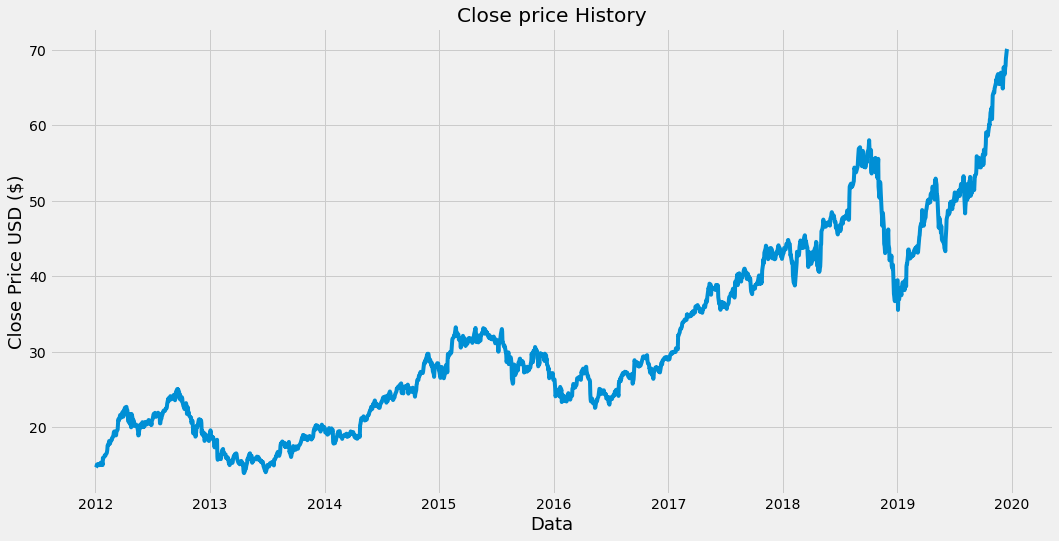

In [6]:
#visualize the closing price history 
plt.figure(figsize=(16,8))
plt.title('Close price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [7]:
#create new dataframe with only the 'Close column'
data=df.filter(['Close'])
#Convert dataframe to a numpy array
dataset=data.values
#Get the number of rows to train the model on 
training_data_len=math.ceil(len(dataset)* .8)
training_data_len

1603

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [9]:
#Craete the training dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [10]:
#Convert the x_train and y_train to numpy array
x_train, y_train=np.array(x_train), np.array(y_train)

In [11]:
#Reshape the data
x_train=np.reshape(x_train, (x_train.shape[0], 60, 1))
x_train.shape

(1543, 60, 1)

In [12]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [13]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [14]:
#Train the model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 43s 26ms/step - loss: 6.8940e-04


In [15]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [16]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [17]:
#Reshape the data
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [18]:
#Get the models predicted price values
predictions= model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.9206414222717285

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


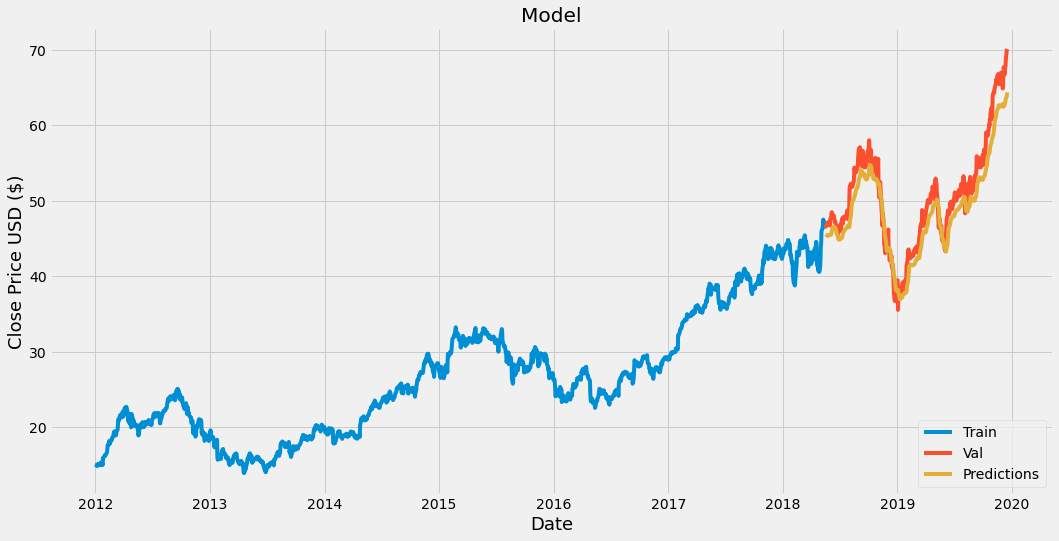

In [20]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
#Show the valid and predicted prices
valid 

,Close,Predictions
Date,,
2018-05-17,46.747501,45.545071
2018-05-18,46.577499,45.524273
2018-05-21,46.907501,45.449726
2018-05-22,46.790001,45.403866
2018-05-23,47.090000,45.362328
2018-05-24,47.037498,45.371086
2018-05-25,47.145000,45.397133
2018-05-29,46.974998,45.445187
2018-05-30,46.875000,45.476692


In [22]:
#Get the quote
apple_quote=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end = '2019-12-17')
#Create a new dataframe 
new_df=apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1 
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#Undo the scaling 
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[64.82711]]
